## Import necessary libraries

In [13]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Extract csv file

In [14]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## Extract Numerical Data Type


In [15]:
NumData = pd.DataFrame(data[['floor_area_sqm', 'lease_commence_date']])
NumData.head()

,floor_area_sqm,lease_commence_date
0,69.0,1986
1,61.0,1986
2,73.0,1976
3,73.0,1976
4,67.0,1976


In [16]:
NumData.describe()

,floor_area_sqm,lease_commence_date
count,369651.000000,369651.000000
mean,96.586204,1987.984659
std,25.598886,9.122421
min,28.000000,1966.000000
25%,73.000000,1981.000000
50%,100.000000,1987.000000
75%,115.000000,1997.000000
max,297.000000,2012.000000


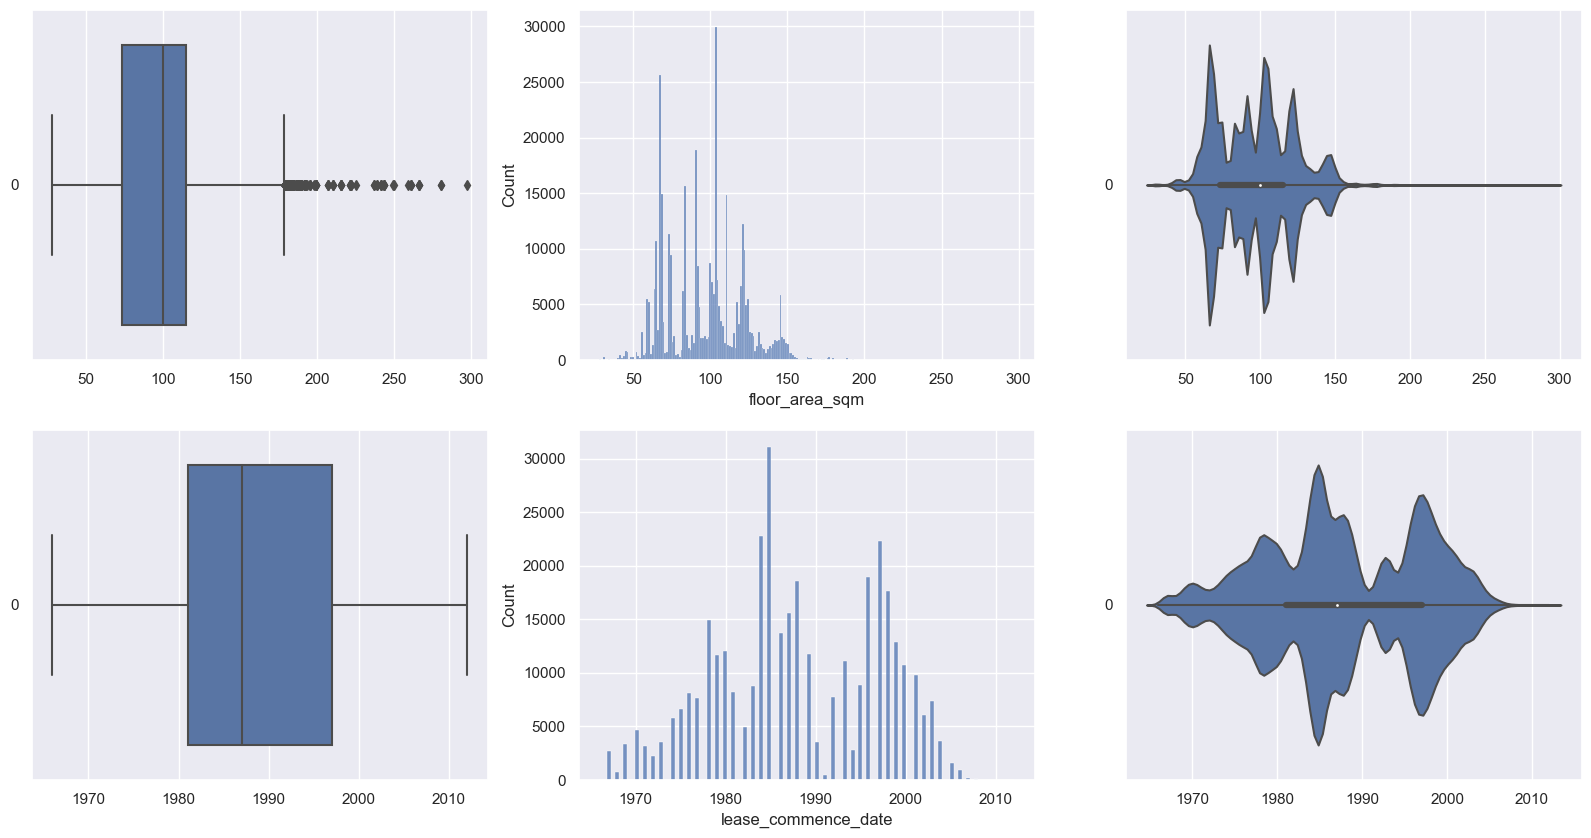

In [18]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(20, 10))

count = 0
for var in NumData:
    sb.boxplot(data = NumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumData[var], ax = axes[count,1])
    sb.violinplot(data = NumData[var], orient = "h", ax = axes[count,2])
    count += 1